In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import wikipedia
import numpy as np
import matplotlib.pyplot as plt
model_name = "MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name )

In [4]:
def compare_sentenses(s1, s2):

       input = tokenizer(s1, s2, truncation=True, return_tensors="pt")
       output = model(input["input_ids"])

       prediction = torch.softmax(output["logits"][0], -1).tolist()
       diff = prediction[2]-prediction[0]
       label_names = ["entailment", "neutral", "contradiction"]
       prediction = {name: round(float(pred) * 100, 1) for pred, name in zip(prediction, label_names)}
       return diff

In [ ]:
wikipedia.set_lang("ar")
ar_list  = wikipedia.page('Al-Ahli Arab Hospital explosion').content.split('\n')

wikipedia.set_lang("he")
he_list  = wikipedia.page('Al-Ahli Arab Hospital explosion').content.split('\n')

l_1 = len(ar_list)

l_2 = len(he_list)
print(l_1, l_2) 

heatmap = np.zeros((l_1, l_2))
for i, s1 in enumerate(ar_list):
       for j, s2 in enumerate(he_list):
              heatmap[i, j] = compare_sentenses(s1, s2)
              print(i, j)
fig, ax = plt.subplots()
im = ax.imshow(heatmap)

# Add the color bar
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

plt.show()    

['הפיצוץ בבית החולים הערבי אל-אַ֫הְלִי (אל-מַעְמַדַ֫אנִי) היה פיצוץ שהתרחש במגרש חניה הסמוך לבית החולים הערבי אל-אהלי שבשכונת זייתון בעיר עזה ב-17 באוקטובר 2023 בשעה 18:59, במהלך מלחמת חרבות ברזל, כתוצאה משיגור רקטה כושל של הג\'יהאד האסלאמי לעבר ישראל. הפיצוץ התרחש בחצר בית החולים, בעת שאלפי עקורים פלסטינים מצפון רצועת עזה חיפשו בו מקלט. לטענת החמאס, מספר ההרוגים בפיצוץ נע בין 200 ל-700 בני אדם, אולם ככל הנראה מספר זה נופח ולפי הערכה של קהילת המודיעין האמריקאית, מספר ההרוגים נע בין 100 ל-300, ככל הנראה קרוב יותר ל-100. באיחוד האירופי מעריכים כי מדובר בעשרות הרוגים בלבד.מייד לאחר האירוע טען משרד הבריאות של הרצועה כי הפיצוץ נגרם כתוצאה מתקיפה אווירית ישראלית. דובר צה"ל הכחיש את הטענה והציג ראיות לפיהן הפיצוץ נגרם כתוצאה מכשל באחת הרקטות של הג\'יהאד האסלאמי הפלסטיני ששוגרו לעבר חיפה.כלי תקשורת רבים בעולם שידרו את טענות החמאס כלשונן, והאשימו את צה"ל בתקיפה. היו גם ממשלות שגינו את ישראל על התקיפה והתקיימו הפגנות נגד ישראל. מפגש של נשיא ארצות הברית ג\'ו ביידן עם מנהיגים ערבים באזור בוטל. על 

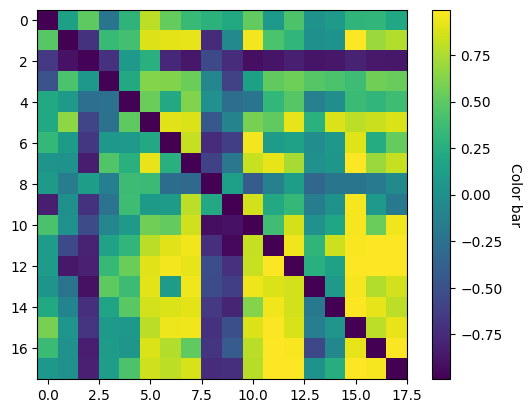

In [18]:
wikipedia.set_lang("ar")
ar_list  = wikipedia.page('Al-Ahli Arab Hospital explosion').content.split('\n')
ar_list = [x for x in ar_list if x != '' and x[0] != "="]
wikipedia.set_lang("he")
he_list  = wikipedia.page('Al-Ahli Arab Hospital explosion').content.split('\n')

print(he_list)
he_list = [x for x in he_list if x != '' and x[0] != "="]

l_1 = len(ar_list)

l_2 = len(he_list)
print(l_1, l_2) 

heatmap = np.zeros((l_2, l_2))
for i, s1 in enumerate(he_list):
       for j, s2 in enumerate(he_list):
              heatmap[i, j] = compare_sentenses(s1, s2)
fig, ax = plt.subplots()
im = ax.imshow(heatmap)

# Add the color bar
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

plt.show()    

In [20]:
wikipedia.set_lang("he")
he_list  = wikipedia.summary('Al-Ahli Arab Hospital explosion')#.content.split('\n')
he_list

'הפיצוץ בבית החולים הערבי אל-אַ֫הְלִי (אל-מַעְמַדַ֫אנִי) היה פיצוץ שהתרחש במגרש חניה הסמוך לבית החולים הערבי אל-אהלי שבשכונת זייתון בעיר עזה ב-17 באוקטובר 2023 בשעה 18:59, במהלך מלחמת חרבות ברזל, כתוצאה משיגור רקטה כושל של הג\'יהאד האסלאמי לעבר ישראל. הפיצוץ התרחש בחצר בית החולים, בעת שאלפי עקורים פלסטינים מצפון רצועת עזה חיפשו בו מקלט. לטענת החמאס, מספר ההרוגים בפיצוץ נע בין 200 ל-700 בני אדם, אולם ככל הנראה מספר זה נופח ולפי הערכה של קהילת המודיעין האמריקאית, מספר ההרוגים נע בין 100 ל-300, ככל הנראה קרוב יותר ל-100. באיחוד האירופי מעריכים כי מדובר בעשרות הרוגים בלבד.מייד לאחר האירוע טען משרד הבריאות של הרצועה כי הפיצוץ נגרם כתוצאה מתקיפה אווירית ישראלית. דובר צה"ל הכחיש את הטענה והציג ראיות לפיהן הפיצוץ נגרם כתוצאה מכשל באחת הרקטות של הג\'יהאד האסלאמי הפלסטיני ששוגרו לעבר חיפה.כלי תקשורת רבים בעולם שידרו את טענות החמאס כלשונן, והאשימו את צה"ל בתקיפה. היו גם ממשלות שגינו את ישראל על התקיפה והתקיימו הפגנות נגד ישראל. מפגש של נשיא ארצות הברית ג\'ו ביידן עם מנהיגים ערבים באזור בוטל. על ס